In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF 
import numpy as np
from sklearn.metrics import mean_absolute_error

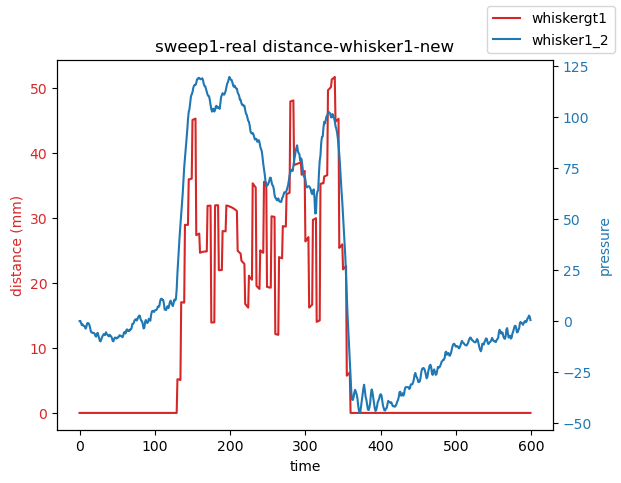

In [14]:
data = pd.read_csv('data1_new.csv')
whisker1_1=data.iloc[:,0].values
whisker1_2=data.iloc[:,1].values
whisker1_3=data.iloc[:,2].values
whisker2_1=data.iloc[:,3].values
whisker2_2=data.iloc[:,4].values
whisker2_3=data.iloc[:,5].values
whiskergt1=data.iloc[:,6].values
whiskergt2=data.iloc[:,7].values
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('distance (mm)', color=color)
ax1.plot(whiskergt1, color=color, label='whiskergt1')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('pressure', color=color)  
ax2.plot(whisker1_2, color=color, label="whisker1_2")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("sweep1-real distance-whisker1-new")
fig.legend(loc="upper right")
plt.savefig("sweep1-real distance-whisker1-new")
plt.show()

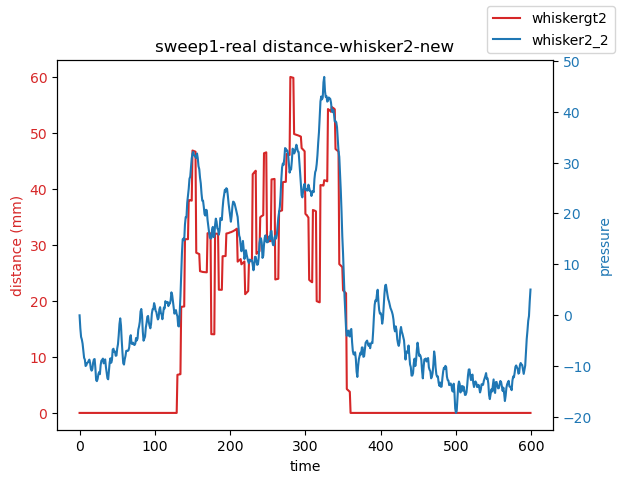

In [6]:
data = pd.read_csv('data1_new.csv')
whisker1_1=data.iloc[:,0].values
whisker1_2=data.iloc[:,1].values
whisker1_3=data.iloc[:,2].values
whisker2_1=data.iloc[:,3].values
whisker2_2=data.iloc[:,4].values
whisker2_3=data.iloc[:,5].values
whiskergt1=data.iloc[:,6].values
whiskergt2=data.iloc[:,7].values
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('distance (mm)', color=color)
ax1.plot(whiskergt2, color=color, label='whiskergt2')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('pressure', color=color)  
ax2.plot(whisker2_2, color=color, label="whisker2_2")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("sweep1-real distance-whisker2-new")
fig.legend(loc="upper right")
plt.savefig("sweep1-real distance-whisker2-new")
plt.show()

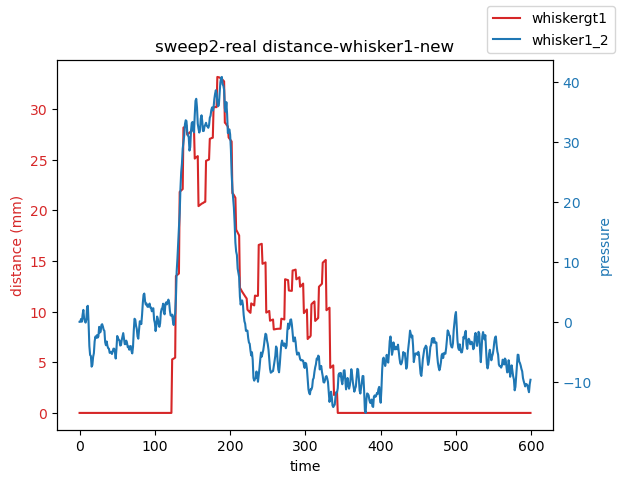

In [7]:
data = pd.read_csv('data2_new.csv')
whisker1_1=data.iloc[:,0].values
whisker1_2=data.iloc[:,1].values
whisker1_3=data.iloc[:,2].values
whisker2_1=data.iloc[:,3].values
whisker2_2=data.iloc[:,4].values
whisker2_3=data.iloc[:,5].values
whiskergt1=data.iloc[:,6].values
whiskergt2=data.iloc[:,7].values
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('distance (mm)', color=color)
ax1.plot(whiskergt1, color=color, label='whiskergt1')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('pressure', color=color)  
ax2.plot(whisker1_2, color=color, label="whisker1_2")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("sweep2-real distance-whisker1-new")
fig.legend(loc="upper right")
plt.savefig("sweep2-real distance-whisker1-new")
plt.show()

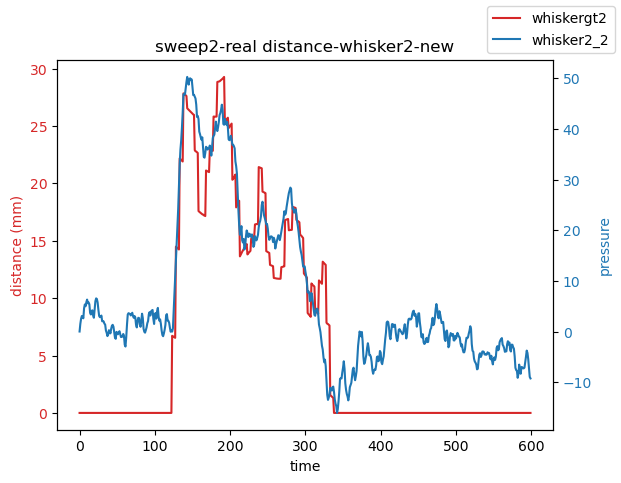

In [8]:
data = pd.read_csv('data2_new.csv')
whisker1_1=data.iloc[:,0].values
whisker1_2=data.iloc[:,1].values
whisker1_3=data.iloc[:,2].values
whisker2_1=data.iloc[:,3].values
whisker2_2=data.iloc[:,4].values
whisker2_3=data.iloc[:,5].values
whiskergt1=data.iloc[:,6].values
whiskergt2=data.iloc[:,7].values
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('distance (mm)', color=color)
ax1.plot(whiskergt2, color=color, label='whiskergt2')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('pressure', color=color)  
ax2.plot(whisker2_2, color=color, label="whisker2_2")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("sweep2-real distance-whisker2-new")
fig.legend(loc="upper right")
plt.savefig("sweep2-real distance-whisker2-new")
plt.show()

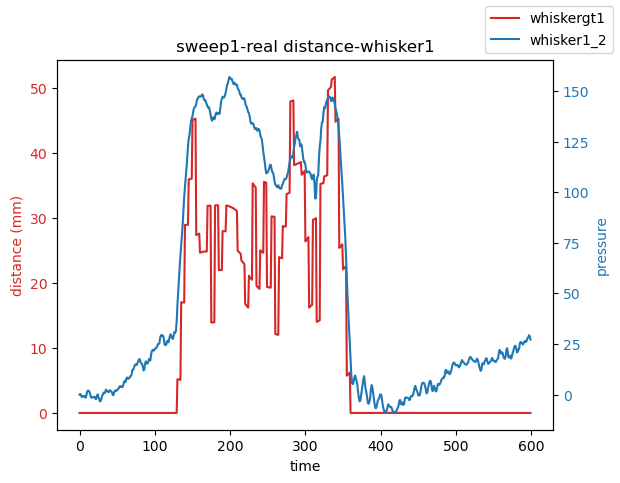

In [22]:
data = pd.read_csv('data3.csv')
whisker1_1=data.iloc[:,0].values
whisker1_2=data.iloc[:,1].values
whisker1_3=data.iloc[:,2].values
whisker2_1=data.iloc[:,3].values
whisker2_2=data.iloc[:,4].values
whisker2_3=data.iloc[:,5].values
whiskergt1=data.iloc[:,6].values
whiskergt2=data.iloc[:,7].values
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('distance (mm)', color=color)
ax1.plot(whiskergt1, color=color, label='whiskergt1')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('pressure', color=color)  
ax2.plot(whisker1_2, color=color, label="whisker1_2")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("sweep1-real distance-whisker1")
fig.legend(loc="upper right")
plt.savefig("sweep1-real distance-whisker1")
plt.show()

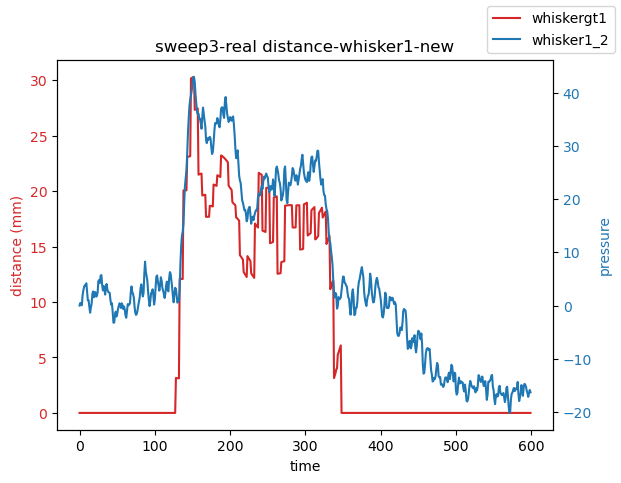

In [16]:
data = pd.read_csv('data3_new.csv')
whisker1_1=data.iloc[:,0].values
whisker1_2=data.iloc[:,1].values
whisker1_3=data.iloc[:,2].values
whisker2_1=data.iloc[:,3].values
whisker2_2=data.iloc[:,4].values
whisker2_3=data.iloc[:,5].values
whiskergt1=data.iloc[:,6].values
whiskergt2=data.iloc[:,7].values
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('distance (mm)', color=color)
ax1.plot(whiskergt1, color=color, label='whiskergt1')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('pressure', color=color)  
ax2.plot(whisker1_2, color=color, label="whisker1_2")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("sweep3-real distance-whisker1-new")
fig.legend(loc="upper right")
plt.savefig("sweep3-real distance-whisker1-new")
plt.show()

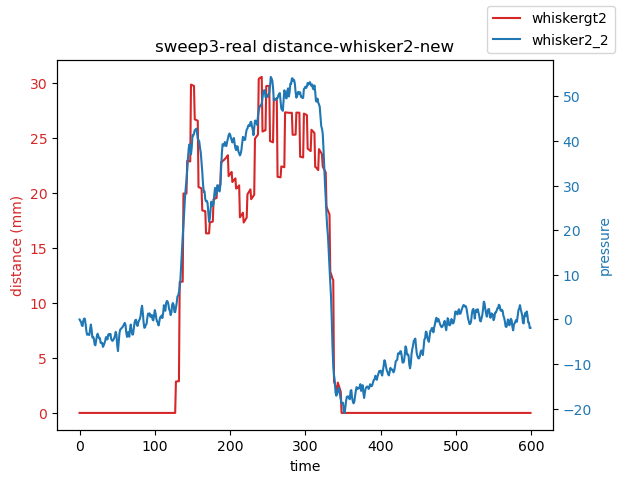

In [17]:
data = pd.read_csv('data3_new.csv')
whisker1_1=data.iloc[:,0].values
whisker1_2=data.iloc[:,1].values
whisker1_3=data.iloc[:,2].values
whisker2_1=data.iloc[:,3].values
whisker2_2=data.iloc[:,4].values
whisker2_3=data.iloc[:,5].values
whiskergt1=data.iloc[:,6].values
whiskergt2=data.iloc[:,7].values
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('distance (mm)', color=color)
ax1.plot(whiskergt2, color=color, label='whiskergt2')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('pressure', color=color)  
ax2.plot(whisker2_2, color=color, label="whisker2_2")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("sweep3-real distance-whisker2-new")
fig.legend(loc="upper right")
plt.savefig("sweep3-real distance-whisker2-new")
plt.show()

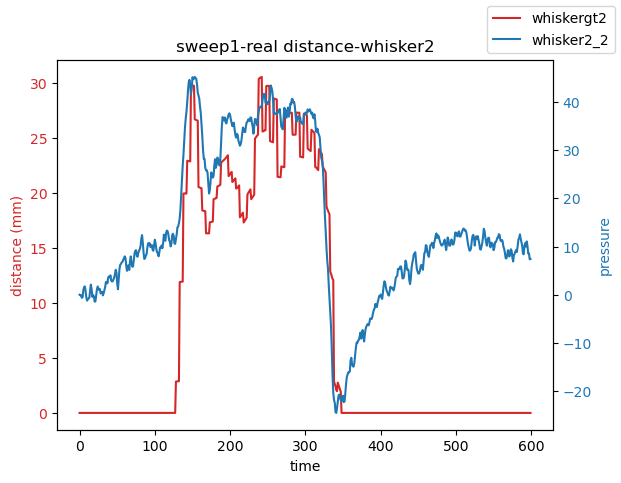

In [183]:
data = pd.read_csv('data3.csv')
whisker1_1=data.iloc[:,0].values
whisker1_2=data.iloc[:,1].values
whisker1_3=data.iloc[:,2].values
whisker2_1=data.iloc[:,3].values
whisker2_2=data.iloc[:,4].values
whisker2_3=data.iloc[:,5].values
whiskergt1=data.iloc[:,6].values
whiskergt2=data.iloc[:,7].values
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('distance (mm)', color=color)
ax1.plot(whiskergt2, color=color, label='whiskergt2')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('pressure', color=color)  
ax2.plot(whisker2_2, color=color, label="whisker2_2")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("sweep1-real distance-whisker2")
fig.legend(loc="upper right")
plt.savefig("sweep1-real distance-whisker2")
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 读取第一个数据集
data1 = pd.read_csv('data2_new.csv')
whisker1_2_data1 = data1.iloc[:, 1].values
whisker2_2_data1 = data1.iloc[:, 4].values
whiskergt1_data1 = data1.iloc[:, 6].values
whiskergt2_data1 = data1.iloc[:, 7].values

# 读取第二个数据集
data2 = pd.read_csv('data3_new.csv')
whisker1_2_data2 = data2.iloc[:, 1].values
whisker2_2_data2 = data2.iloc[:, 4].values
whiskergt1_data2 = data2.iloc[:, 6].values
whiskergt2_data2 = data2.iloc[:, 7].values

# 合并数据集
whisker1_2 = np.concatenate((whisker1_2_data1, whisker1_2_data2))
whisker2_2 = np.concatenate((whisker2_2_data1, whisker2_2_data2))
whiskergt1 = np.concatenate((whiskergt1_data1, whiskergt1_data2))
whiskergt2 = np.concatenate((whiskergt2_data1, whiskergt2_data2))

# 划分训练集和测试集
train_whisker1, test_whisker1, train_whisker2, test_whisker2, train_whiskergt1, test_whiskergt1, train_whiskergt2, test_whiskergt2 = train_test_split(whisker1_2, whisker2_2, whiskergt1, whiskergt2, test_size=0.25, shuffle=True)

filter_indices_train = train_whisker1 >= 10
filter_indices_test = test_whisker1 >= 10

# 将符合条件的数据索引对应位置上的whisker和whiskergt数据保留
train_whisker1_filtered = train_whisker1[filter_indices_train]
train_whisker2_filtered = train_whisker2[filter_indices_train]
train_whiskergt1_filtered = train_whiskergt1[filter_indices_train]
train_whiskergt2_filtered = train_whiskergt2[filter_indices_train]

test_whisker1_filtered = test_whisker1[filter_indices_test]
test_whisker2_filtered = test_whisker2[filter_indices_test]
test_whiskergt1_filtered = test_whiskergt1[filter_indices_test]
test_whiskergt2_filtered = test_whiskergt2[filter_indices_test]


train_whisker1_filtered1=train_whisker1_filtered.reshape(-1,1)
train_whisker2_filtered1=train_whisker2_filtered.reshape(-1,1)
test_whisker1_filtered1=test_whisker1_filtered.reshape(-1,1)
test_whisker2_filtered1=test_whisker2_filtered.reshape(-1,1)

train_gradient1 = np.gradient(train_whisker1_filtered, axis=0)
train_gradient2 = np.gradient(train_whisker2_filtered, axis=0)
test_gradient1 = np.gradient(test_whisker1_filtered, axis=0)
test_gradient2 = np.gradient(test_whisker2_filtered, axis=0)

# # 合并训练数据和梯度
train_whisker1_filtered2 = np.column_stack((train_whisker1_filtered, train_gradient1))
train_whisker2_filtered2 = np.column_stack((train_whisker2_filtered, train_gradient2))
test_whisker1_filtered2 = np.column_stack((test_whisker1_filtered, test_gradient1))
test_whisker2_filtered2 = np.column_stack((test_whisker2_filtered, test_gradient2))




(MAE): 2.8555007847850606
(MSE): 3.246160850520857


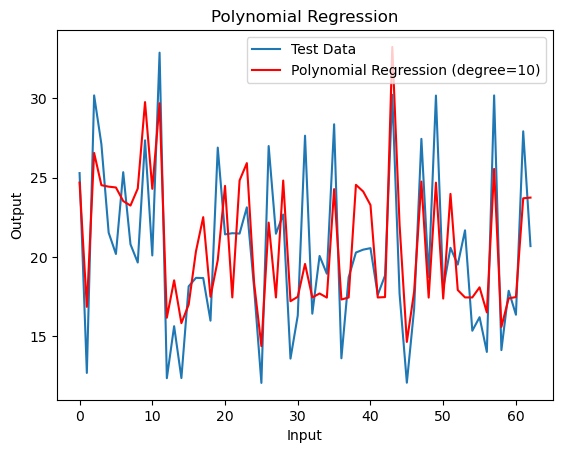

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV


# 使用多项式特征扩展训练集输入数据
degree = 5  # 多项式的阶数
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('lin_reg', LinearRegression())
])

param_grid = {
    'poly_features__degree': [1, 2, 3, 4, 5,6,7,8,9,10]  # 定义多项式的阶数
}

grid_search = GridSearchCV(polynomial_regression,param_grid, cv=5, scoring='neg_mean_absolute_error')

# 拟合 GridSearchCV 对象
grid_search.fit(train_whisker1_filtered1, train_whiskergt1_filtered)
best_lr = grid_search.best_estimator_



# 预测测试集输出数据
y_pred = best_lr .predict(test_whisker1_filtered1)

# 计算均方误差
mae = mean_absolute_error(test_whiskergt1_filtered, y_pred)
print("(MAE):", mae)
rmse = np.sqrt(mean_squared_error(test_whiskergt1_filtered, y_pred))
print("(MSE):", rmse)

# 绘制拟合曲线和测试集数据
plt.plot( test_whiskergt1_filtered, label='Test Data')
plt.plot(y_pred, color='red', label='Polynomial Regression (degree={})'.format(grid_search.best_params_['poly_features__degree']))
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

(MAE): 2.36330165371384
(MSE): 2.8812670478329756


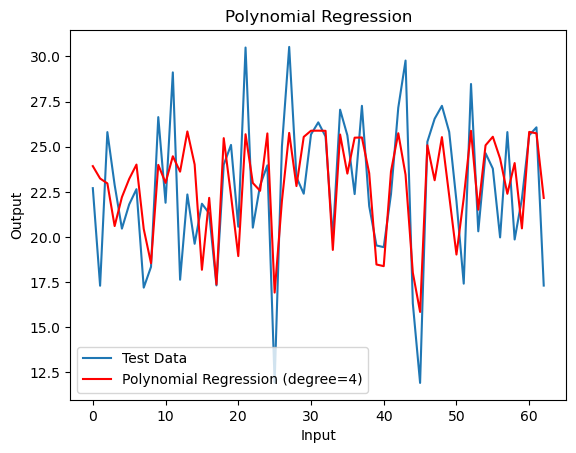

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV


# 使用多项式特征扩展训练集输入数据
degree = 5  # 多项式的阶数
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('lin_reg', LinearRegression())
])

param_grid = {
    'poly_features__degree': [1, 2, 3, 4, 5,6,7,8,9,10]  # 定义多项式的阶数
}

grid_search = GridSearchCV(polynomial_regression,param_grid, cv=5, scoring='neg_mean_absolute_error')

# 拟合 GridSearchCV 对象
grid_search.fit(train_whisker2_filtered1, train_whiskergt2_filtered)
best_lr = grid_search.best_estimator_



# 预测测试集输出数据
y_pred = best_lr .predict(test_whisker2_filtered1)

# 计算均方误差
mae = mean_absolute_error(test_whiskergt2_filtered, y_pred)
print("(MAE):", mae)
rmse = np.sqrt(mean_squared_error(test_whiskergt2_filtered, y_pred))
print("(MSE):", rmse)

# 绘制拟合曲线和测试集数据
plt.plot( test_whiskergt2_filtered, label='Test Data')
plt.plot(y_pred, color='red', label='Polynomial Regression (degree={})'.format(grid_search.best_params_['poly_features__degree']))
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 2.8808150046388503
(RMSE): 3.29407580048039


/tmp/ipykernel_3436/563485187.py:31: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = 1.96 * np.sqrt(np.diag(cov))


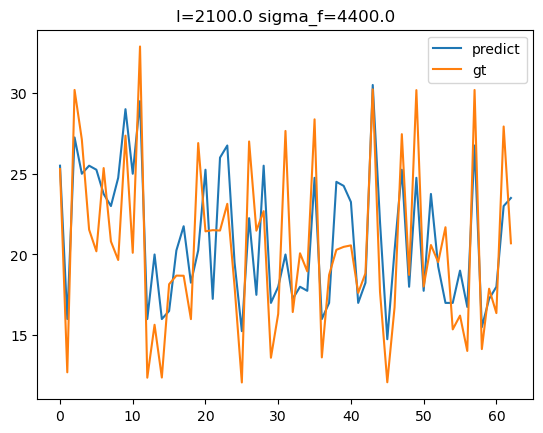

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV


# Define the parameter grid to search over
constant_values = np.arange(1e-4, 5000, 50)

length_scales = np.arange(1e-4, 5000, 50)

# 定义参数网格
param_grid = {
    "kernel": [
        ConstantKernel(constant_value=c , constant_value_bounds='fixed') * RBF(length_scale=l, length_scale_bounds='fixed')
        for c in constant_values
        for l in length_scales
    ]
}

# Initialize Gaussian Process Regressor
gpr = GaussianProcessRegressor()

# Grid search over parameters
grid_search = GridSearchCV(gpr, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(train_whisker1_filtered1, train_whiskergt1_filtered)

# Get the best model
best_gpr = grid_search.best_estimator_

# Predict on the test set
mu, cov = best_gpr.predict(test_whisker1_filtered1, return_cov=True)
test_y = mu.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov))
# negative_indices = np.where(test_y < 0)[0]
# over100_indices = np.where(test_y > 40)[0]

# Replace negative values with the previous valid value
# for i in negative_indices:
#     test_y[i] = test_y[i - 1]

# # Replace values over 100 with the previous valid value
# for i in over100_indices:
#     test_y[i] = test_y[i - 1]

# Plotting
plt.title("l=%.1f sigma_f=%.1f" % (best_gpr.kernel_.k2.length_scale, best_gpr.kernel_.k1.constant_value))
plt.plot(test_y , label="predict")
plt.plot(test_whiskergt1_filtered, label="gt")
plt.legend()
mae = mean_absolute_error(test_whiskergt1_filtered, test_y)
print("Mean Absolute Error (MAE):", mae)
rmse = np.sqrt(mean_squared_error(test_whiskergt1_filtered, test_y))
print("(RMSE):", rmse)

Mean Absolute Error (MAE): 2.5187190382804694
(RMSE): 2.939813805747303


/tmp/ipykernel_7821/3775643707.py:30: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = 1.96 * np.sqrt(np.diag(cov))


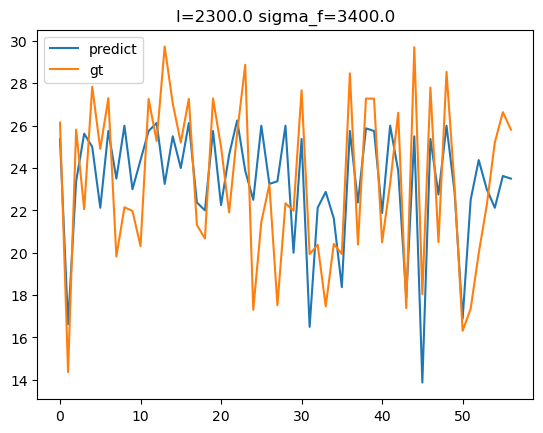

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV


# Define the parameter grid to search over
constant_values = np.arange(1e-4, 5000, 50)
length_scales = np.arange(1e-4, 5000, 50)

# 定义参数网格
param_grid = {
    "kernel": [
        ConstantKernel(constant_value=c, constant_value_bounds='fixed') * RBF(length_scale=l, length_scale_bounds='fixed')
        for c in constant_values
        for l in length_scales
    ]
}

# Initialize Gaussian Process Regressor
gpr = GaussianProcessRegressor()

# Grid search over parameters
grid_search = GridSearchCV(gpr, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(train_whisker2_filtered1, train_whiskergt2_filtered)

# Get the best model
best_gpr = grid_search.best_estimator_

# Predict on the test set
mu, cov = best_gpr.predict(test_whisker2_filtered1, return_cov=True)
test_y = mu.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov))
# negative_indices = np.where(test_y < 0)[0]
# over100_indices = np.where(test_y > 40)[0]

# Replace negative values with the previous valid value
# for i in negative_indices:
#     test_y[i] = test_y[i - 1]

# # Replace values over 100 with the previous valid value
# for i in over100_indices:
#     test_y[i] = test_y[i - 1]

# Plotting
plt.title("l=%.1f sigma_f=%.1f" % (best_gpr.kernel_.k2.length_scale, best_gpr.kernel_.k1.constant_value))
plt.plot(test_y , label="predict")
plt.plot(test_whiskergt2_filtered, label="gt")
plt.legend()
mae = mean_absolute_error(test_whiskergt2_filtered, test_y)
print("Mean Absolute Error (MAE):", mae)
rmse = np.sqrt(mean_squared_error(test_whiskergt2_filtered, test_y))
print("(RMSE):", rmse)

Mean Absolute Error (MAE): 15.737690045092016


/home/chaoxiangye/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/chaoxiangye/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 25.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/tmp/ipykernel_7821/339654848.py:7: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = 1.96 * np.sqrt(np.diag(cov))


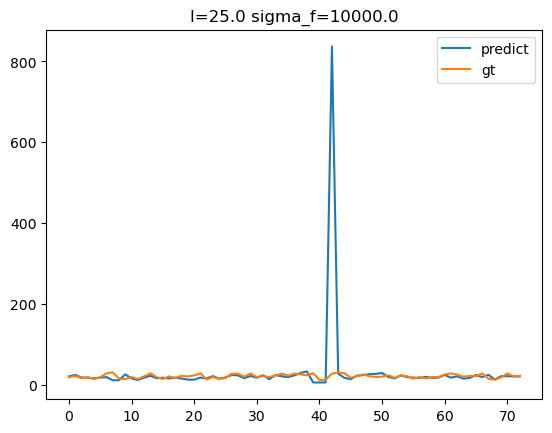

In [53]:
# fit GPR
kernel = ConstantKernel(constant_value=0.2, constant_value_bounds=(1e-4, 1e4)) * RBF(length_scale=500, length_scale_bounds=(25, 1e4))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=50)
gpr.fit(train_whisker1_filtered2, train_whiskergt1_filtered)
mu, cov = gpr.predict(test_whisker1_filtered2, return_cov=True)
test_y = mu.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov))
negative_indices = np.where(test_y < 0)[0]
over100_indices = np.where(test_y > 40)[0]

# 将小于0的异常值替换为前一个有效值
for i in negative_indices:
    test_y[i] = test_y[i - 1]

# 将大于100的异常值替换为前一个有效值
for i in over100_indices:
    test_y[i] = test_y[i - 1]

# plotting
# plt.figure()
plt.title("l=%.1f sigma_f=%.1f" % (gpr.kernel_.k2.length_scale, gpr.kernel_.k1.constant_value))
# plt.fill_between(test_whisker1.ravel(), test_whiskergt1 + uncertainty, test_whiskergt1 - uncertainty, alpha=0.1)
plt.plot(test_y , label="predict")
plt.plot(test_whiskergt1_filtered, label="gt")
# plt.scatter(train_whisker1, train_whiskergt1, label="train", c="red", marker="x")

plt.legend()
mae = mean_absolute_error(test_whiskergt1_filtered, test_y )
print("Mean Absolute Error (MAE):", mae)

[[-3.999340594717747, -0.8866726923656536], [-1.7179141364743895, 3.8290562212176633], [-1.2217288683475518, -1.2673189888128942], [-2.3318959042301755, -1.046769128667397], [-2.3442401150740784, -2.94320686846493], [0.7677604346191451, 2.5811716407580896], [3.1714304138331393, -0.3526690536314483], [-3.2919234638866453, 2.329278428311275], [1.851523284397179, -3.6724243617886465], [-2.964745967212566, -0.43535216916126007], [2.649346966944808, -0.9547628672186645], [0.3347634010198526, 1.728953417142372], [0.5764469754473707, 2.093646060445028], [3.4916424437698614, 0.2142760918450941], [0.8294210707737353, -2.543620577636169], [-3.9793975750720483, 1.9725342687625176], [0.7204919001482297, 3.2852392348656103], [-0.43860694039472037, -2.814586276619199], [0.056912960475063556, -2.0771267801396247], [-0.15178944285514273, 1.7007391597881796], [-1.5161934281917846, -1.991934178017929], [-0.4400762472453206, 0.17931287405537155], [2.0776372627440294, 1.6080135803723428], [2.4943605605242

c:\CX\CONDA\conda\envs\pytorchgpu\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[7.67385656e-06 1.53477131e-05 1.43564710e-05 1.08524720e-05
            nan            nan 1.53477131e-05 9.39851646e-06
            nan 1.32915094e-05 1.71592649e-05 1.43564710e-05
            nan 1.71592649e-05 1.21334326e-05            nan
 1.53477131e-05 5.42623601e-06 2.36524144e-05 1.08524720e-05
 1.53477131e-05 7.67385656e-06 9.39851646e-06 0.00000000e+00
 1.71592649e-05 1.71592649e-05 1.79967889e-05 1.32915094e-05
 1.21334326e-05 2.30215697e-05 5.42623601e-06            nan
 9.39851646e-06 1.53477131e-05 0.00000000e+00 1.21334326e-05
 1.08524720e-05 0.00000000e+00 1.21334326e-05 1.43564710e-05
            nan            nan 9.39851646e-06 2.03031160e-05
 1.53477131e-05 1.62787080e-05 1.53477131e-05 1.08524720e-05
 1.08524720e-05 1.21334326e-05 1.08524720e-05 1.53477131e-05
 1.62787080e-05 7.67385656e-06 5.42623601e-06 9.39851646e-06
 2.65830189e-05            nan 1.53477131e-05 9.39851646e-06
            nan            nan            nan 7.67385656e-06
 9.39851646e-06]
Mean Ab

C:\Users\chaoxiangye\AppData\Local\Temp\ipykernel_3168\2389970153.py:7: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = 1.96 * np.sqrt(np.diag(cov))


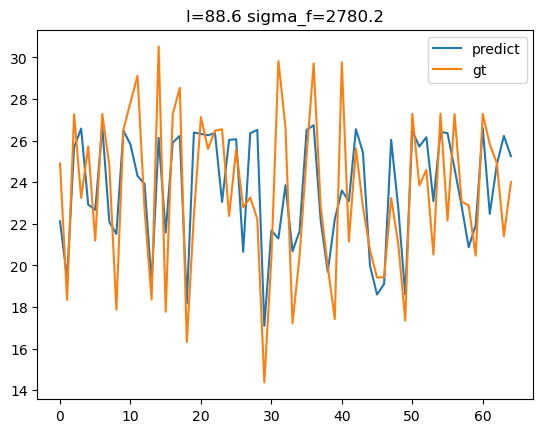

In [268]:
# fit GPR
kernel = ConstantKernel(constant_value=0.2, constant_value_bounds=(1e-4, 1e4)) * RBF(length_scale=5000, length_scale_bounds=(50, 1e4))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=200,normalize_y=True)
gpr.fit(train_whisker2_filtered1, train_whiskergt2_filtered)
mu, cov = gpr.predict(test_whisker2_filtered1, return_cov=True)
test_y = mu.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov))
negative_indices = np.where(test_y < 0)[0]
over100_indices = np.where(test_y > 40)[0]
print(uncertainty)
# 将小于0的异常值替换为前一个有效值
for i in negative_indices:
    test_y[i] = test_y[i - 1]

# 将大于100的异常值替换为前一个有效值
for i in over100_indices:
    test_y[i] = test_y[i - 1]
# plotting
plt.figure()
plt.title("l=%.1f sigma_f=%.1f" % (gpr.kernel_.k2.length_scale, gpr.kernel_.k1.constant_value))
plt.fill_between(np.arange(len(test_y)), test_y + uncertainty, test_y - uncertainty, alpha=0.1)
plt.plot(test_y,label="predict")
plt.plot(test_whiskergt2_filtered,label="gt")
plt.legend()
mae = mean_absolute_error(test_whiskergt2_filtered, test_y )
print("Mean Absolute Error (MAE):", mae)
mse=mean_squared_error(test_whiskergt2_filtered, test_y )
print("Mean Squared Error (MAE):", mse)

In [5]:
from sklearn.preprocessing import StandardScaler
data3 = pd.read_csv('data1_new.csv')
whisker1_2_data3 = data3.iloc[:, 1].values
whisker2_2_data3 = data3.iloc[:, 4].values
whiskergt1_data3 = data3.iloc[:, 6].values
whiskergt2_data3 = data3.iloc[:, 7].values


# 划分训练集和测试集
train_whisker1, test_whisker1, train_whisker2, test_whisker2, train_whiskergt1, test_whiskergt1, train_whiskergt2, test_whiskergt2 = train_test_split(whisker1_2_data3, whisker2_2_data3, whiskergt1_data3, whiskergt2_data3, test_size=0.25, shuffle=True)

filter_indices_train = train_whisker1 >= 15
filter_indices_test = test_whisker1 >= 15

# 将符合条件的数据索引对应位置上的whisker和whiskergt数据保留
train_whisker1_filtered = train_whisker1[filter_indices_train]
train_whisker2_filtered = train_whisker2[filter_indices_train]
train_whiskergt1_filtered = train_whiskergt1[filter_indices_train]
train_whiskergt2_filtered = train_whiskergt2[filter_indices_train]

test_whisker1_filtered = test_whisker1[filter_indices_test]
test_whisker2_filtered = test_whisker2[filter_indices_test]
test_whiskergt1_filtered = test_whiskergt1[filter_indices_test]
test_whiskergt2_filtered = test_whiskergt2[filter_indices_test]

train_whisker1_filtered=train_whisker1_filtered.reshape(-1,1)
train_whisker2_filtered=train_whisker2_filtered.reshape(-1,1)
test_whisker1_filtered=test_whisker1_filtered.reshape(-1,1)
test_whisker2_filtered=test_whisker2_filtered.reshape(-1,1)



/home/chaoxiangye/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Mean Absolute Error (MAE): 8.667727573872076


/home/chaoxiangye/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 30.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/tmp/ipykernel_7959/104156798.py:7: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = 1.96 * np.sqrt(np.diag(cov))


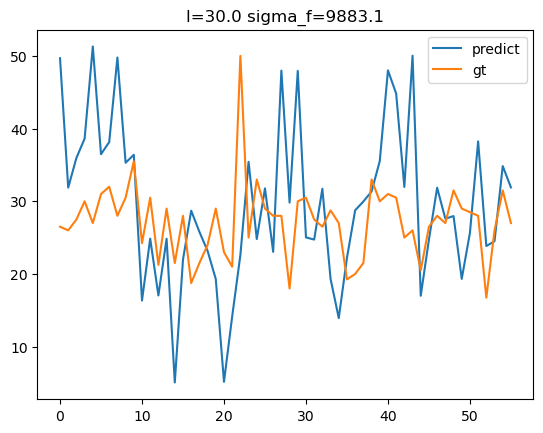

In [6]:
# fit GPR
kernel = ConstantKernel(constant_value=0.2, constant_value_bounds=(1e-4, 1e4)) * RBF(length_scale=0.5, length_scale_bounds=(30, 1e4))
gpr3 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=200)
gpr3.fit(train_whisker1_filtered, train_whiskergt1_filtered)
mu, cov = gpr3.predict(test_whisker1_filtered, return_cov=True)
test_y = mu.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov))

negative_indices = np.where(test_y < 10)[0]
over100_indices = np.where(test_y > 50)[0]
for i in negative_indices:
    test_y[i] = 50

# 将大于100的异常值替换为前一个有效值
for i in over100_indices:
    test_y[i] = 10
# plotting
plt.figure()
plt.title("l=%.1f sigma_f=%.1f" % (gpr3.kernel_.k2.length_scale, gpr3.kernel_.k1.constant_value))
# plt.fill_between(test_whisker1.ravel(), test_whiskergt1 + uncertainty, test_whiskergt1 - uncertainty, alpha=0.1)
plt.plot(test_whiskergt1_filtered, label="predict")
plt.plot(test_y, label="gt")
# plt.scatter(train_whisker1, train_whiskergt1, label="train", c="red", marker="x")
plt.legend()
mae = mean_absolute_error(test_whiskergt1_filtered, test_y)
print("Mean Absolute Error (MAE):", mae)

/home/chaoxiangye/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Mean Absolute Error (MAE): 8.05780766767857


/home/chaoxiangye/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 10000.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/tmp/ipykernel_7959/3447316792.py:7: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = 1.96 * np.sqrt(np.diag(cov))


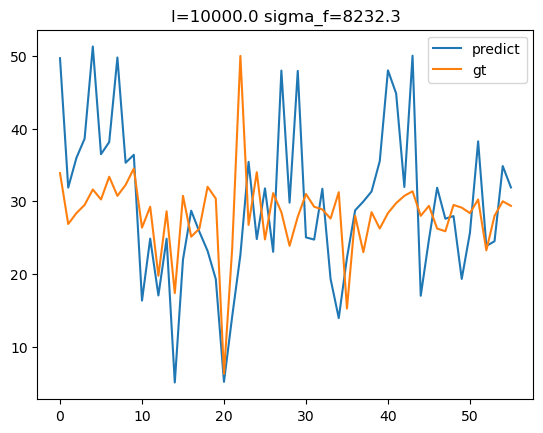

In [7]:
# fit GPR
kernel = ConstantKernel(constant_value=0.2, constant_value_bounds=(10, 1e4)) * RBF(length_scale=10, length_scale_bounds=(10000, 1e4))
gpr3 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=200)
gpr3.fit(train_whisker1_filtered, train_whiskergt1_filtered)
mu, cov = gpr3.predict(test_whisker1_filtered, return_cov=True)
test_y = mu.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov))

negative_indices = np.where(test_y < 0)[0]
over100_indices = np.where(test_y > 50)[0]
for i in negative_indices:
    test_y[i] = 50

# 将大于100的异常值替换为前一个有效值
for i in over100_indices:
    test_y[i] = 0
# plotting
plt.figure()
plt.title("l=%.1f sigma_f=%.1f" % (gpr3.kernel_.k2.length_scale, gpr3.kernel_.k1.constant_value))
# plt.fill_between(test_whisker1.ravel(), test_whiskergt1 + uncertainty, test_whiskergt1 - uncertainty, alpha=0.1)
plt.plot(test_whiskergt1_filtered, label="predict")
plt.plot(test_y, label="gt")
# plt.scatter(train_whisker1, train_whiskergt1, label="train", c="red", marker="x")
plt.legend()
mae = mean_absolute_error(test_whiskergt1_filtered, test_y)
print("Mean Absolute Error (MAE):", mae)

(MAE): 7.7929470950725745


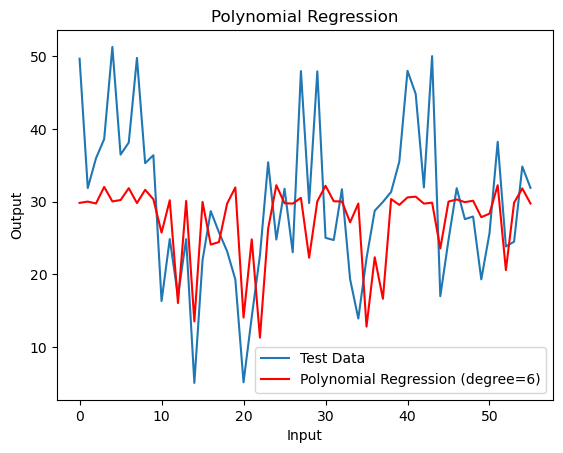

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 使用多项式特征扩展训练集输入数据
degree = 6 # 多项式的阶数
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(train_whisker1_filtered)

# 使用线性回归模型拟合扩展后的训练集数据
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, train_whiskergt1_filtered)

# 使用多项式特征扩展测试集输入数据
X_test_poly = poly_features.transform(test_whisker1_filtered)

# 预测测试集输出数据
y_pred = lin_reg.predict(X_test_poly)

# 计算均方误差
mae = mean_absolute_error(test_whiskergt1_filtered, y_pred)
print("(MAE):", mae)

# 绘制拟合曲线和测试集数据
plt.plot( test_whiskergt1_filtered, label='Test Data')
plt.plot( y_pred, color='red', label='Polynomial Regression (degree={})'.format(degree))
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

(MAE): 7.230730022568319


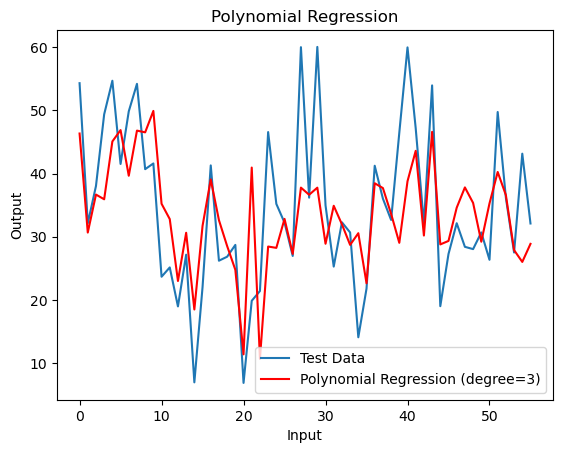

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 使用多项式特征扩展训练集输入数据
degree = 3 # 多项式的阶数
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(train_whisker2_filtered)

# 使用线性回归模型拟合扩展后的训练集数据
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, train_whiskergt2_filtered)

# 使用多项式特征扩展测试集输入数据
X_test_poly = poly_features.transform(test_whisker2_filtered)

# 预测测试集输出数据
y_pred = lin_reg.predict(X_test_poly)
negative_indices = np.where(y_pred < 0)[0]
over100_indices = np.where(y_pred > 100)[0]
for i in negative_indices:
    y_pred[i] = y_pred[i - 1]

# 将大于100的异常值替换为前一个有效值
for i in over100_indices:
    y_pred[i] = y_pred[i - 1]
# 计算均方误差
mae = mean_absolute_error(test_whiskergt2_filtered, y_pred)
print("(MAE):", mae)

# 绘制拟合曲线和测试集数据
plt.plot( test_whiskergt2_filtered, label='Test Data')
plt.plot( y_pred, color='red', label='Polynomial Regression (degree={})'.format(degree))
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 2.674371742799022e-12


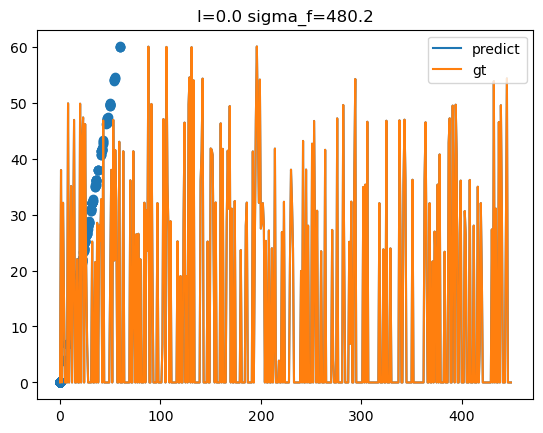

In [110]:
# fit GPR
kernel = ConstantKernel(constant_value=0.2, constant_value_bounds=(1e-4, 1e4)) * RBF(length_scale=0.5, length_scale_bounds=(1e-4, 1e4))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=2)
gpr.fit(train_whisker2, train_whiskergt2)
mu, cov = gpr.predict(train_whisker2, return_cov=True)
test_y = mu.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
# plotting
plt.figure()
plt.title("l=%.1f sigma_f=%.1f" % (gpr.kernel_.k2.length_scale, gpr.kernel_.k1.constant_value))
# plt.fill_between(test_whisker2.ravel(), test_whiskergt2 + uncertainty, test_whiskergt2 - uncertainty, alpha=0.1)
plt.plot(test_y,label="predict")
plt.plot(train_whiskergt2,label="gt")
plt.scatter(test_y,train_whiskergt2)
plt.legend()
mae = mean_absolute_error(train_whiskergt2, test_y)
print("Mean Absolute Error (MAE):", mae)

您好，请问MSELOO为什么只能用来估计lengthscale呢？超参数中σ2的变化不也会导致predictive mean的变化吗？所以我同时优化两个超参数不可以吗？只是predictive variance无法得到优化而已。